<a href="https://colab.research.google.com/github/dzkmrn/2141720076-pcvk-2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 7**
## Muhammad Dzaka | 2141720076 | TI-3H

### Akses file dan import library

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Sharpen


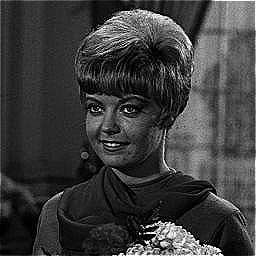

Emboss


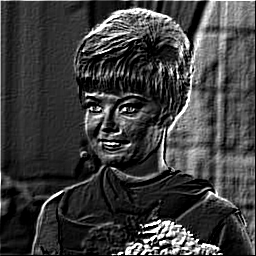

Left Sobel Edge Detection


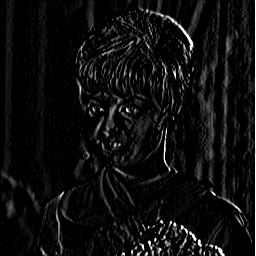

Canny Edge Detection


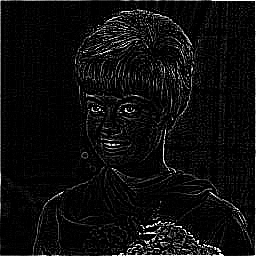

Prewitt Edge Detection


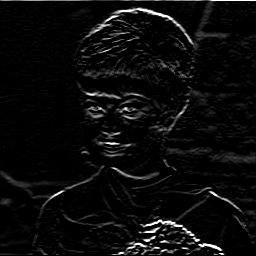

5x5 Gaussian Blur


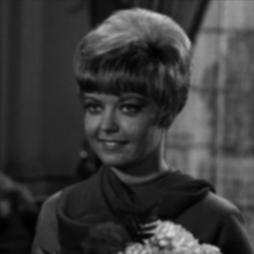

21x21 Gaussian Blur


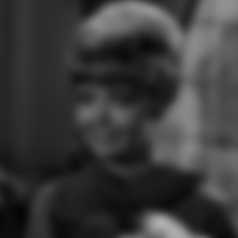

In [50]:
from google.colab.patches import cv2_imshow

# load itra dan jadikan abu
img = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#image sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

#image emboss
kernel_emboss = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])

#image Left Sobel Edge Detection
kernel_lsed = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]])

#image Left Sobel Canny Edge Detection
kernel_ced = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

#image Prewitt Edge Detection
kernel_ped = np.array([[-1, -1, -1],
                        [0, 0, 0],
                        [1, 1, 1]])

#image 5x5 Gaussian Blur
kernel_gaussian = np.array([[1, 4, 6, 4, 1],
                   [4, 16, 24, 16, 4],
                   [6, 24, 36, 24, 6],
                   [4, 16, 24, 16, 4],
                   [1, 4, 6, 4, 1]]) / 256

#image 21x21 Gaussian Blur
# Define the kernel size and sigma
sigma=math.sqrt(21)
gaussian_kernel = cv.getGaussianKernel(21, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

def convolution2d(image: np.ndarray, kernel: np.ndarray, stride: int, padding: int) -> None:
    # Get image and kernel dimensions
    image_height, image_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]

    # Calculate output dimensions
    output_height = image_height - kernel_height + 2 * padding + 1
    output_width = image_width - kernel_width + 2 * padding + 1

    # Initialize padded array
    padded_image = np.zeros((image_height + 2 * padding, image_width + 2 * padding))
    padded_image[padding:-padding, padding:-padding] = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Initialize output array
    output = np.zeros((output_height, output_width))

    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            output[i][j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

      # Add title and caption to the resulting image
    font = cv.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (255, 255, 255)
    line_type = 1

    cv2_imshow(output)

print("Sharpen")
convolution2d(img, kernel_sharpen, 1, 1)
print("Emboss")
convolution2d(img, kernel_emboss, 1, 1)
print("Left Sobel Edge Detection")
convolution2d(img, kernel_lsed, 1, 1)
print("Canny Edge Detection")
convolution2d(img, kernel_ced, 1, 1)
print("Prewitt Edge Detection")
convolution2d(img, kernel_ped, 1, 1)
print("5x5 Gaussian Blur")
convolution2d(img, kernel_gaussian, 1, 1)
print("21x21 Gaussian Blur")
convolution2d(img, gauss_kernel, 1, 1)

### Tugas
Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP